In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from local_GP_toolbox import *
%matplotlib inline

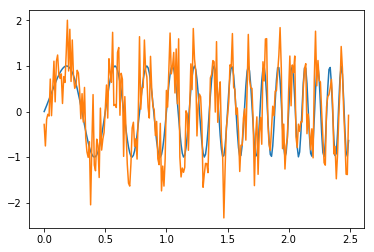

In [2]:
##  Test script ## Ocilillations

# Time axes
time_min = 0.
time_max = 2.5
time_step = 0.01
time = np.arange(time_min, time_max, time_step)

# Windows
#spacing = 0.1

# Test signal
noise_sd = 0.5
initial_frequency = 2*np.pi*1
quadratic_factor = 2*np.pi*2
signal = np.sin(initial_frequency*time + quadratic_factor*np.power(time,2)) 
instantaneous_frequency = (initial_frequency + 2*quadratic_factor*time)/(2*np.pi)


training_data = signal + np.random.normal(loc=0,scale=noise_sd,size=signal.shape)
plt.plot(time, signal)
plt.plot(time, training_data)

In [3]:


# Instantiate local GP analysis
local_GP = locally_coupled_GP_analysis()
training_time = {"time_min": time_min, "time_max": time_max, "time_step": time_step}
local_GP.input_data(training_data, training_time = training_time)
spacing = 0.1 #0.1
width = 0.25
time_windows = np.arange(time_min, time_max, spacing)
frequency_min = 0.1
frequency_max = 12
frequency_step = (frequency_max - frequency_min)/len(time_windows)
frequency_range  = np.arange(frequency_min, frequency_max, frequency_step)
function_and_parameters = {"function": local_GP.archive_window_functions["generalized_gaussian"], "parameters": {"width": width, "power":2.}}
local_GP.initialize_windows(function_and_parameters, spacing)
nonstationary_parameter = {"type": "frequency", "range": frequency_range}
covariance_function_and_parameters = {"function": local_GP.archive_covariance_functions["oscillatory"], "parameters":{"amplitude": 1, "width": 0.6}, "nonstationary_parameter": nonstationary_parameter}
expectation_function_and_parameters = {"function": local_GP.archive_expectation_functions["constant"], "parameters":{"expectation": 0}}
local_GP.initialize_local_prior_GP(covariance_function_and_parameters, expectation_function_and_parameters)
local_GP.initialize_prior_HMM(expectation = 0.1, autoregressive_coefficient = 1, innovation_variance = 0.2**2 , initial_expectation = 0.1, initial_variance = 10**2)
noise_function_and_parameters = {"function": local_GP.archive_covariance_functions["white_noise"], "parameters": {"standard_deviation": noise_sd}}
local_GP.initialize_likelihood(noise_function_and_parameters)
local_GP.perform_hierarchical_analysis()

The target time has not been specified, using the training time as target time
The data have been correctly inputted
Constructing window functions
The window functions have been initialized
Constructing covariance matrix
Constructing expectations
The local Gaussian process priors have been initialized
Constructing transfer matrix
The hidden Markov model prior has been initialized
Constructing noise covariance matrix
The likelihood (noise model) has been initialized
Computing the local likelihoods
Computing the posterior of the hidden Markov model
Constructing the prior of the global Gaussian process
Computing the posterior of the global Gaussian process
The locally coupled GP analysis has been succesfully completed


In [4]:
#Stationary analysis

# frequency range
frequency_step = 0.1
frequency_min = 0.1
frequency_max = 12
frequency_range  = np.arange(frequency_min, frequency_max, frequency_step)

# Instantiate local GP analysis
stationary_GP = locally_coupled_GP_analysis()
training_time = {"time_min": time_min, "time_max": time_max, "time_step": time_step}
stationary_GP.input_data(training_data, training_time = training_time)
spacing = 100 #0.1
width = 1000
time_windows = np.arange(time_min, time_max, spacing)
function_and_parameters = {"function": local_GP.archive_window_functions["generalized_gaussian"], "parameters": {"width": width, "power":2.}}
stationary_GP.initialize_windows(function_and_parameters, spacing)
nonstationary_parameter = {"type": "frequency", "range": frequency_range}
covariance_function_and_parameters = {"function": local_GP.archive_covariance_functions["oscillatory"], "parameters":{"amplitude": 1, "width": 0.4}, "nonstationary_parameter": nonstationary_parameter}
expectation_function_and_parameters = {"function": local_GP.archive_expectation_functions["constant"], "parameters":{"expectation": 0}}
stationary_GP.initialize_local_prior_GP(covariance_function_and_parameters, expectation_function_and_parameters)
stationary_GP.initialize_prior_HMM(expectation = 0.1, autoregressive_coefficient = 1, innovation_variance = 0.1**2 , initial_expectation = 0.1, initial_variance = 10**2)
noise_function_and_parameters = {"function": local_GP.archive_covariance_functions["white_noise"], "parameters": {"standard_deviation": noise_sd}}
stationary_GP.initialize_likelihood(noise_function_and_parameters)
stationary_GP.perform_hierarchical_analysis()



The target time has not been specified, using the training time as target time
The data have been correctly inputted
Constructing window functions
The window functions have been initialized
Constructing covariance matrix
Constructing expectations
The local Gaussian process priors have been initialized
Constructing transfer matrix
The hidden Markov model prior has been initialized
Constructing noise covariance matrix
The likelihood (noise model) has been initialized
Computing the local likelihoods
Computing the posterior of the hidden Markov model
Constructing the prior of the global Gaussian process
Computing the posterior of the global Gaussian process
The locally coupled GP analysis has been succesfully completed


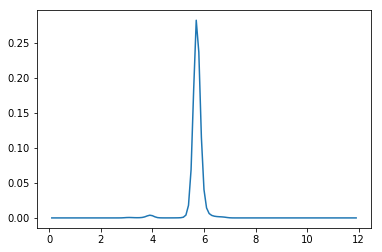

In [5]:
plt.plot(frequency_range, (stationary_GP.posterior_HMM.posterior_probability).flatten())
#print local_GP.posterior_HMM.posterior_probability.shape


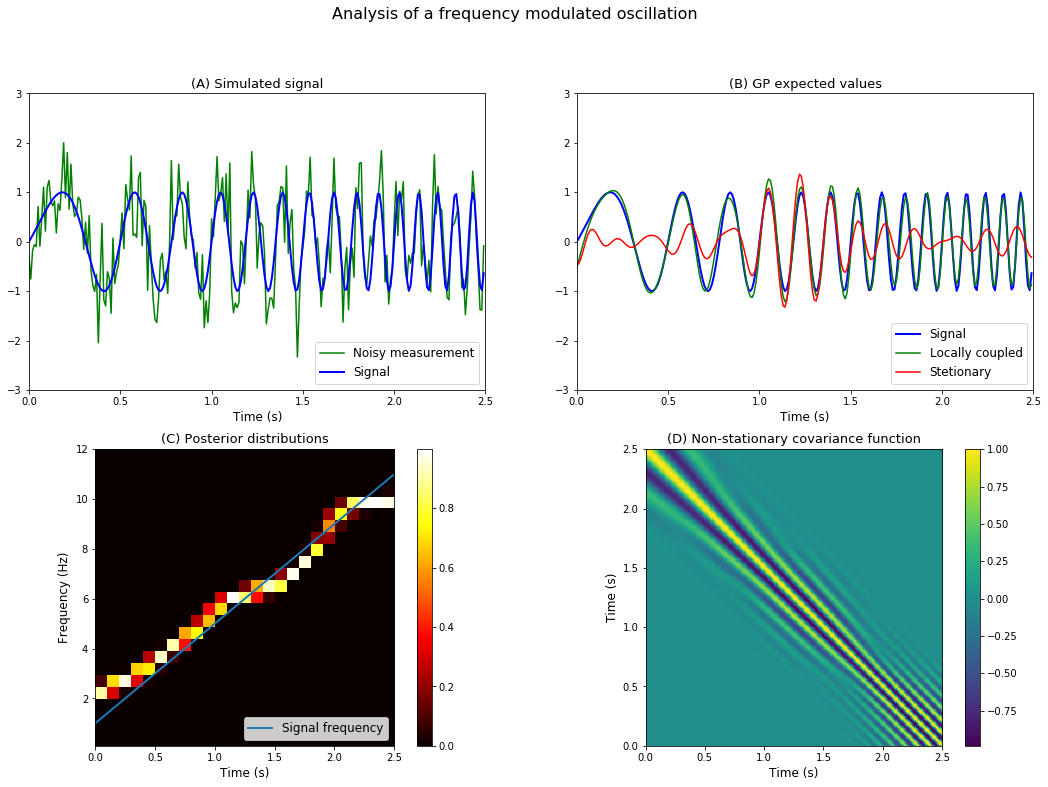

In [7]:
window_time = np.arange(time_min,time_max,spacing)

f, axs = plt.subplots(2,2,figsize=(3*6,2*6))
plt.suptitle("Analysis of a frequency modulated oscillation", fontsize=16)

ax1 = plt.subplot(221)
plt.plot(time, training_data, label = "Noisy measurement", c = "green")
plt.plot(time, signal, label = "Signal", lw = 2, c = "blue")
plt.title("(A) Simulated signal", fontsize=13)
plt.xlabel('Time (s)', fontsize=12)
#plt.ylabel('Covariance', fontsize=12)
axes = plt.gca()
axes.set_ylim([-3,3])
axes.set_xlim([time_min,time_max])
plt.legend(loc = 4, fontsize=12)

ax2 = plt.subplot(223)
plt.imshow(np.array(local_GP.posterior_HMM.posterior_probability),extent=[time_min,time_max,frequency_min,frequency_max], origin = "lower", cmap = "hot")
#plt.plot(frequency_axes, np.absolute(quadrature_covariance_spectrum))
plt.title("(C) Posterior distributions", fontsize=13)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Frequency (Hz)', fontsize=12)
ax2.axes.set_aspect(time_max/frequency_max)
#bounds = np.arange(0,1,0.001)
plt.colorbar()
plt.plot(time, instantaneous_frequency, lw = 2, label = "Signal frequency")
plt.legend(loc = 4, fontsize=12)

ax3 = plt.subplot(224)
plt.imshow(np.array(local_GP.global_prior_GP.covariance_matrices["extrapolation"]), extent=[time_min,time_max,time_min,time_max])
plt.title("(D) Non-stationary covariance function", fontsize=13)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.colorbar()

ax4 = plt.subplot(222)
plt.plot(time, signal, label = "Signal", lw = 2, c = "blue")
plt.plot(time, np.array(local_GP.posterior_GP.expectation), c = "green", label = "Locally coupled")
plt.plot(time, np.array(stationary_GP.posterior_GP.expectation), c = "red", label = "Stetionary")
#plt.plot(frequency_axes, np.absolute(quasiQuadrature_covariance_spectrum))
plt.title("(B) GP expected values", fontsize=13)
plt.xlabel('Time (s)', fontsize=12)
#plt.ylabel('Power', fontsize=12)
axes = plt.gca()
axes.set_ylim([-3,3])
axes.set_xlim([time_min, time_max])
plt.legend(loc = 4, fontsize=12)